In [10]:
import pandas as pd
import os
#from fastai.vision.all import *
from fastai.tabular.all import *

In [15]:
df_path = '../image_data_assorted.csv'
df = pd.read_csv(df_path)

In [49]:
df.head()

,Radius,X_Position,Y_Position,Area,Surface2d,Volume,image_path,mask_path,shape
0,83,339,254,3444,283,571787,images_assorted/image_1.png,masks_assorted/mask_1.png,triange
1,67,203,421,2244,229,300763,images_assorted/image_2.png,masks_assorted/mask_2.png,triange
2,61,231,360,3721,244,226981,images_assorted/image_3.png,masks_assorted/mask_3.png,square
3,51,227,376,8167,160,555366,images_assorted/image_4.png,masks_assorted/mask_4.png,circle
4,57,347,420,3249,228,185193,images_assorted/image_5.png,masks_assorted/mask_5.png,square


In [26]:
columns = df.columns


batch_size = 64      # where you declare batch size
#cat_names  = [.....] # insert column names to use as inputs with categorical data here 
cont_names = [col for col in columns if col != 'shape'] # removes shapes column data
cont_names = [col for col in cont_names if col != 'image_path'] # removes image_path column data
cont_names = [col for col in cont_names if col != 'mask_path'] # removes mask_path column data

cat_names = [] # insert column names to use as inputs with Numerical values here
target = 'shape'

In [27]:
dls = TabularDataLoaders.from_csv( 
df_path,                    # Path to the CSV file 
y_names=target,             # Name of the target column 
cat_names=cat_names,        # List of categorical data column names 
cont_names=cont_names,      # List of continuous values column names 
bs=batch_size               # Batch size
)

In [28]:
dls.show_batch()

,Radius,X_Position,Y_Position,Area,Surface2d,Volume,shape
0,65.0,374.0,252.0,4225.0,260.0,274625.0,square
1,53.0,154.0,182.0,1404.0,181.0,148877.0,triange
2,78.0,441.0,405.0,3042.0,266.0,474552.0,triange
3,74.0,214.0,71.0,5476.0,296.0,405224.0,square
4,21.0,223.0,363.0,1385.0,66.0,38773.0,circle
5,61.0,231.0,360.0,3721.0,244.0,226981.0,square
6,15.0,388.0,374.0,706.0,47.0,14130.0,circle
7,42.0,280.0,117.0,5539.0,132.0,310182.0,circle
8,100.0,107.0,171.0,31400.0,314.0,4186667.0,circle
9,64.0,211.0,283.0,4096.0,256.0,262144.0,square


In [39]:
model = Simplemodel()  # Note the parentheses , metrics=rmse
#learn = Learner(dls, model,loss_func=CrossEntropyLossFlat())

learn = tabular_learner(dls, layers=[200, 100], metrics=accuracy)
#learn.loss_func = nn.MSELoss()  # or a custom loss function

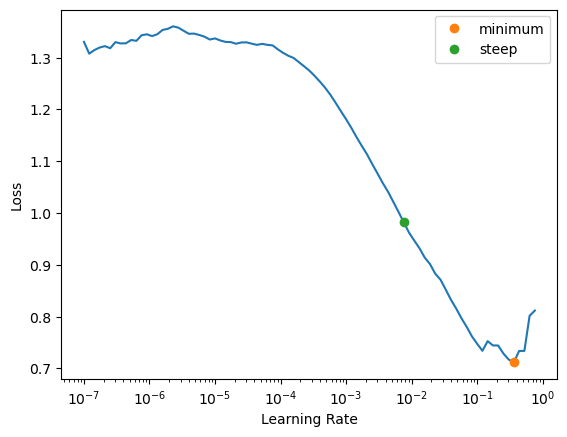

In [32]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [40]:

learn.fit_one_cycle(200,lr_max=lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,0.854667,0.945135,0.710000,00:00
1,0.696449,0.721599,0.840000,00:00
2,0.578367,0.496017,0.905000,00:00
3,0.482846,0.337033,0.945000,00:00
4,0.409151,0.231080,0.975000,00:00
5,0.346148,0.219831,0.900000,00:00
6,0.289689,0.112105,1.000000,00:00
7,0.241888,0.134902,0.935000,00:00
8,0.209140,0.063151,0.995000,00:00
9,0.176164,0.076430,0.970000,00:00


<bound method Recorder.plot_loss of Recorder>


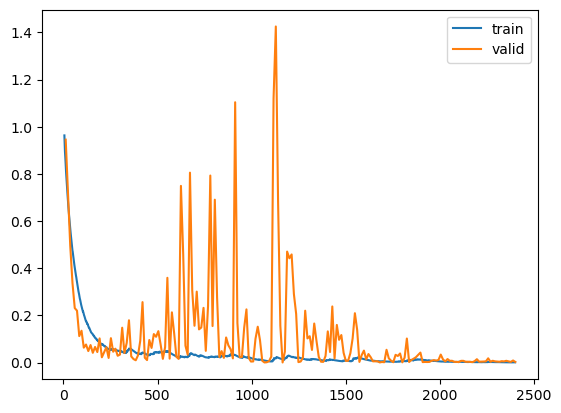

In [41]:
# Plot the losses
learn.recorder.plot_loss()
print(learn.recorder.plot_loss)
# Set the y-axis limits (replace with your desired limits)
#plt.ylim(0, 5)  # sets y-axis limits 
# Show the plot with updated y-limits
plt.show()

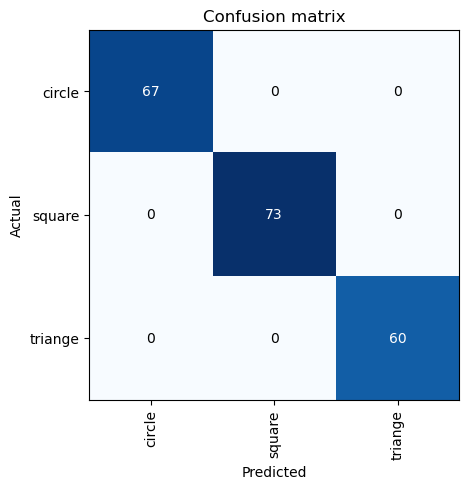

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [43]:


learn.export('exported_classification_tabular_model.pkl')
 


In [44]:
# import

learn2 = load_learner('exported_classification_tabular_model.pkl')   # using learner2 to show its loading

In [52]:

# Get the nth row (e.g., 2nd row)
n = 6  # Remember, indexing starts at 0
nth_row = df.iloc[n]

Prediction, ClassID, Confidence =learn2.predict(nth_row)

# just getting a random image from df
image_paths = df['image_path']
image_data = PILImage.create('../'+image_paths[n])


In [53]:
print(Prediction)
print(ClassID)
print(Confidence)

   Radius  X_Position  Y_Position    Area  Surface2d    Volume  shape
0    78.0       381.0       319.0  3042.0      266.0  474552.0    2.0
tensor(2)
tensor([1.4703e-04, 7.1966e-05, 9.9978e-01])


<Axes: >

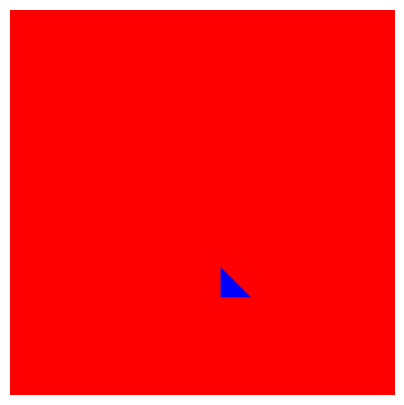

In [54]:
image_data.show()

In [56]:
from interpr import PermutFI

In [58]:
fields =  cont_names


try : 
    fi_coin.empty_cache(learn=learn)
    print("cleared")
    
except : 
    print("nothing to delete")


fi = PermutFI(learn=learn, df=df, rounds=5, fields=fields, is_use_cache=True)


nothing to delete
here


ValueError: Expected input batch_size (1) to match target batch_size (1000).